# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [4]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [5]:
import numpy as np 
from matplotlib import pyplot as plt

In [6]:
def construct_design_martix(x, y, m):
    n = len(x)
    A = np.ones(n,m)
    for i in range(m-1):
        A[:, i+1] = np.multiply(A[:, i], x)

In [7]:
def solve(x,y,m):
    A = construct_design_matrix(x,y,m)
    tr_A = np.transpose(A)
    tr_AA = tr_A@A
    b = tr_A@y
    beta = np.linalg.solve(tr_AA,b)
    return beta

In [8]:
def pol_(x, beta):
    m = len(beta)
    pol =0.0
    for j in range(m):
        pol += beta[j]*x**j
    return pol

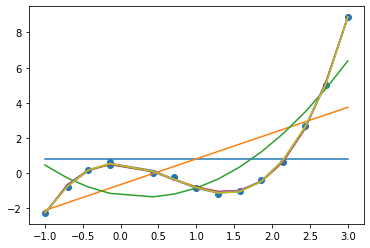

In [9]:
plt.scatter(x,y)
for m in range(1,10,1):
    beta_=solve(x,y,m)
    y_=[eval_beta(_,beta_) for _ in x]
    plt.plot(x,y_)
plt.show()

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [10]:
def opt_val(x, y, m):
    beta_ = solve(x, y, m)
    y_=[eval_beta(_,beta_) for _ in x]
    n = len(x)
    pol =0.0
    for j in range(n):
        pol += (y_[j]-y[j])**2
    t = 1/(n-m)
    return t*pol, beta_

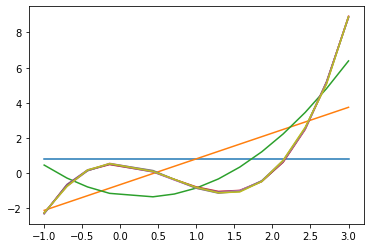

In [11]:
delta = []
beta = []
t = range(1, 10,1)
for m in t:
    delta_, beta_ = opt_val(x, y, m)
    delta.append(delta_)
    beta.append(beta_)
    y_=[eval_beta(_,beta_) for _ in x]
    plt.plot(x, y_)

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

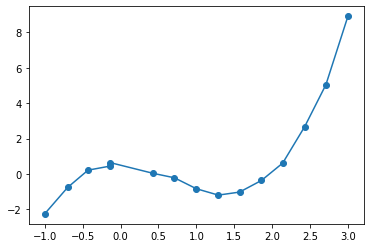

In [12]:
plt.scatter(x, y)
plt.plot(x, y)
plt.show()

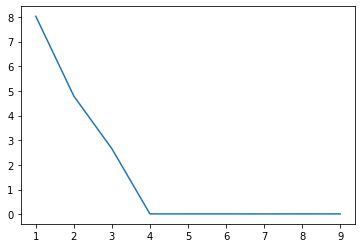

In [13]:
plt.plot(t,delta)

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [14]:
import numpy as np
from matplotlib import pyplot as plt 

def construct_design_matrix(x,y,m):
    n=len(x)
    #print(n)
    A=np.ones((n,m))
    for i in range(m-1):
        A[:,i+1]=np.multiply(A[:,i],x)
    return A

In [15]:
def solve_normal_equation(x,y,m):
    A=construct_design_matrix(x,y,m)
    Q,R=np.linalg.qr(A)
    QT=np.transpose(Q)
    fr=QT@y
    f=fr[0:m]
    R1=R[0:m,:]
    beta=np.linalg.solve(R1,f)
    return beta

In [16]:
def eval_beta(xval,beta):
    m=len(beta)
    term=0.0
    for j in range(m):
        term+=beta[j]*xval**j
    return term

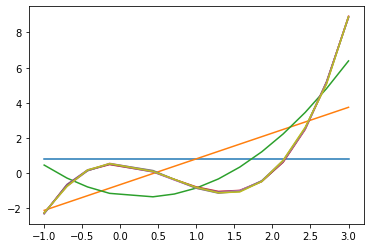

In [18]:
t = range(1, 10,1)
for m in t:
    delta_, beta_ = opt_val(x, y, m)
    delta.append(delta_)
    beta.append(beta_)
    y_=[eval_beta(_,beta_) for _ in x]
    plt.plot(x, y_)

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [44]:
def Lan(x, xk, k):
    n = len(xk)
    t = 1.0
    for i in range(n):
        if i == m:
            num = xk - xk[i]
            den = xk[k]-xk[i]
            t*=num/den
    return t

In [45]:
def lin_Lag_int(x,xk,yk):
    return sum(yk[i]*Lan(x,xk,i) for i in range(len(xk)))

In [46]:
def f(x):
    return (x**2)*np.cos(x)

In [47]:
xv=np.linspace(np.pi/2,np.pi,10)
fv=[f(x) for x in xv]

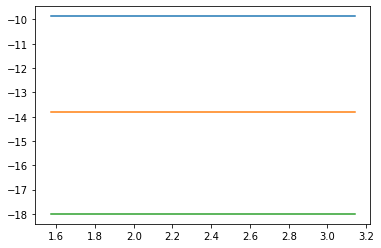

In [49]:
for m in range(2,5,1):
    xv=np.linspace(np.pi/2,np.pi,m)
    yv=[f(x) for x in xv]
    xv100=np.linspace(np.pi/2,np.pi,100)
    langv=[lin_Lag_int(_,xv,yv) for _ in xv100]
    plt.plot(xv100,langv)
plt.show()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

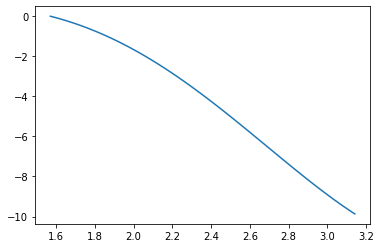

In [50]:
left_range=np.pi/2
right_range=np.pi

xv100=np.linspace(left_range,right_range,100)
fv100=[f(x) for x in xv100]
plt.plot(xv100,fv100)